In [39]:
# use conda env "pix2pix"
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import bee_utils as bee

In [2]:
ACTIVATIONS_FILE = Path("../Pointnet_Pointnet2_pytorch/log/classification/2024-07-03_23-11/logs/activations_per_class_2024-07-07_21-31.csv")


In [3]:
df = pd.read_csv(ACTIVATIONS_FILE, sep=",", header="infer")
display(df.head())
print(df.shape)

,sample_path,target_name,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,...,act_246,act_247,act_248,act_249,act_250,act_251,act_252,act_253,act_254,act_255
0,bee\bee_m3_9_173.csv,bee,0.3010,2.0272,4.1678,3.3139,-3.1765,-3.7755,-0.8893,-1.0369,...,1.7473,2.8463,2.6158,0.1144,0.5105,-0.9958,0.2716,-0.4925,3.2274,3.7249
1,dragonfly\dragonfly_h3_16_5.csv,dragonfly,-0.4388,-2.1274,-1.9290,1.6530,2.1485,0.3740,1.4394,1.4486,...,2.7210,-1.9469,0.3603,0.8599,-1.1127,-1.3361,-0.2451,4.1941,-3.2254,-1.3841
2,dragonfly\dragonfly_h3_7_3.csv,dragonfly,-1.6570,-3.2599,-3.4520,-0.1127,3.6516,2.0707,2.0069,0.2193,...,1.2225,-2.7819,-1.7092,-2.6011,-0.5383,0.6987,0.3600,1.3153,-4.2728,-3.1347
3,dragonfly\dragonfly_h3_20_4.csv,dragonfly,-1.8893,-2.6136,-3.1396,-0.1442,3.1646,1.7044,1.5216,0.0714,...,0.6659,-2.3111,-1.7217,-2.6481,-0.7520,0.9051,0.7258,0.6922,-3.6374,-3.0055
4,dragonfly\dragonfly_h3_15_6.csv,dragonfly,-0.9444,-2.8684,-2.3194,0.6992,2.6901,0.9253,2.1163,0.7845,...,1.7728,-2.3983,-0.2892,-0.4470,-0.4031,-0.0552,-0.0644,2.7268,-3.8311,-1.7947


(132, 258)


In [13]:
# Factorize
classes_map = dict(zip(bee.CLASSES, range(len(bee.CLASSES))))
print(classes_map)
df['target_index'] = df['target_name'].map(classes_map)
df["target_index"]

{'bee': 0, 'butterfly': 1, 'dragonfly': 2, 'wasp': 3, 'insect': 4, 'other': 5}


0      0
1      2
2      2
3      2
4      2
      ..
127    0
128    0
129    0
130    0
131    1
Name: target_index, Length: 132, dtype: int64

In [14]:
activations_df = df.iloc[:,2:]
display(activations_df.head())

,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,...,act_247,act_248,act_249,act_250,act_251,act_252,act_253,act_254,act_255,target_index
0,0.3010,2.0272,4.1678,3.3139,-3.1765,-3.7755,-0.8893,-1.0369,-0.9056,3.7203,...,2.8463,2.6158,0.1144,0.5105,-0.9958,0.2716,-0.4925,3.2274,3.7249,0
1,-0.4388,-2.1274,-1.9290,1.6530,2.1485,0.3740,1.4394,1.4486,3.3848,-0.0106,...,-1.9469,0.3603,0.8599,-1.1127,-1.3361,-0.2451,4.1941,-3.2254,-1.3841,2
2,-1.6570,-3.2599,-3.4520,-0.1127,3.6516,2.0707,2.0069,0.2193,2.3549,-1.0713,...,-2.7819,-1.7092,-2.6011,-0.5383,0.6987,0.3600,1.3153,-4.2728,-3.1347,2
3,-1.8893,-2.6136,-3.1396,-0.1442,3.1646,1.7044,1.5216,0.0714,1.7733,-1.1440,...,-2.3111,-1.7217,-2.6481,-0.7520,0.9051,0.7258,0.6922,-3.6374,-3.0055,2
4,-0.9444,-2.8684,-2.3194,0.6992,2.6901,0.9253,2.1163,0.7845,2.7158,-0.3164,...,-2.3983,-0.2892,-0.4470,-0.4031,-0.0552,-0.0644,2.7268,-3.8311,-1.7947,2


In [51]:
cmap = matplotlib.cm.get_cmap('Set1')
for i in range(8):
    rgba = cmap(i/8)
    print(rgba)


(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0)
(0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0)
(0.596078431372549, 0.3058823529411765, 0.6392156862745098, 1.0)
(1.0, 0.4980392156862745, 0.0, 1.0)
(1.0, 1.0, 0.2, 1.0)
(0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0)
(0.9686274509803922, 0.5058823529411764, 0.7490196078431373, 1.0)


i:\WorkspaceSSD\.conda\envs\pix2pix\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(132, 2)

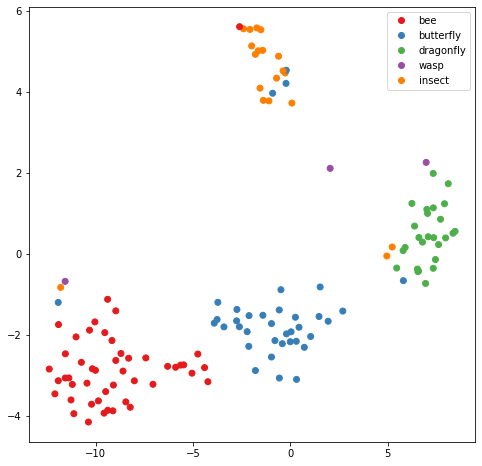

In [53]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components, init="pca", learning_rate="auto")
tsne_result = tsne.fit_transform(activations_df)
display(tsne_result.shape)
# (1000, 2)
# Two dimensions for each of our images


# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
fig, ax = plt.subplots(1)
# vmin vmax for Colormap normalization; Set1 has 8 colors
scatter = ax.scatter(x=tsne_result[:,0], y=tsne_result[:,1], c=df["target_index"], cmap="Set1", vmin=0, vmax=8)
fig.set_size_inches(8,8)
ax.legend(handles=scatter.legend_elements()[0], labels=bee.CLASSES)

# lim = (tsne_result.min()-5, tsne_result.max()+5)
# ax.set_xlim(lim)
# ax.set_ylim(lim)
# ax.set_aspect('equal')
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)